# Озоновый слой Земли (О.С. Угольников, 2008-11-3)
The table shows the results of measuring the brightness of the background of a clear daytime sky in relative units (their own for each of the wavelengths) at the zenith at different positions of the Sun above the horizon for three wavelengths located on the long-wavelength edge of the Heggins bands of atmospheric ozone absorption ( $\left.\mathrm{O}_3\right)$ . Considering that the background of the daytime sky is formed by the scattering of sunlight in the lower layers of the atmosphere (under the ozone layer), and the scattering properties smoothly depend on the wavelength, determine the total ozone content (OCO) in the column of the atmosphere above the observer. Express it as the thickness of the pure ozone layer at normal atmospheric pressure $\left(1.014 \cdot 10^5\right.$ P) and temperature $0^{\circ}\mathrm{C}$. The values of the cross section (effective area) of absorption of one ozone molecule in each of the three wavelengths are also shown in the table.
$$
\begin{array}{||c|c|c|c||}
\hline 
\text{The height of the sun,}
 &  &\text{Photometer readings} & \\
\text{degrees}& 3100 \mathring{\mathrm{A}} & 3500  \mathring{\mathrm{A}} & 3900  \mathring{\mathrm{A}} \\
\hline 31.5 & 487.6 & 2005.7 & 1158.1 \\
33.3 & 567.3 & 2166.7 & 1281.6 \\
33.6 & 576.3 & 2195.4 & 1304.2 \\
34.6 & 629.5 & 2296.2 & 1379.6 \\
36.4 & 712.0 & 2440.1 & 1479.9 \\
38.2 & 801.4 & 2600.3 & 1591.4 \\
39.2 & 862.4 & 2716.5 & 1673.5 \\
41.0 & 953.8 & 2840.8 & 1751.2 \\
43.1 & 1079.9 & 3048.9 & 1880.6 \\
44.9 & 1186.7 & 3209.4 & 1969.2 \\
46.1 & 1260.6 & 3324.4 & 2038.0 \\
47.8 & 1374.2 & 3480.0 & 2119.6 \\
49.5 & 1496.6 & 3654.4 & 2226.4 \\
\hline \text{section} & & & \\
\text{acquisitions} & 1.0 \cdot 10^{-23} & 3.9 \cdot 10^{-26} & 1.0 \cdot 10^{-26} \\
\text{molecules} ~~\mathrm{O}_3, ~~м ^2 & & & \\
\hline \hline
\end{array}
$$

In [2]:

wl=	'''3100"Å"	3500"Å"	3900"Å"'''
data = '''
31.5	487.6	2005.7	1158.1
33.3	567.3	2166.7	1281.6
33.6	576.3	2195.4	1304.2
34.6	629.5	2296.2	1379.6
36.4	712.0	2440.1	1479.9
38.2	801.4	2600.3	1591.4
39.2	862.4	2716.5	1673.5
41.0	953.8	2840.8	1751.2
43.1	1079.9	3048.9	1880.6
44.9	1186.7	3209.4	1969.2
46.1	1260.6	3324.4	2038.0
47.8	1374.2	3480.0	2119.6
49.5	1496.6	3654.4	2226.4
'''
'Сечение	поглощения	молекулы O_(3) м ^(2)'	
sigma='1.0*10^(-23)	3.9*10^(-26)	1.0*10^(-26)'
	

In [10]:
lines = data.split('\n')
items = [line.split('\t') for line in lines]
items = []
for line in lines:
    items.append(line.split('\t'))
# items    
import numpy as np
np.asarray(items[1:-1]).astype(float)

array([[  31.5,  487.6, 2005.7, 1158.1],
       [  33.3,  567.3, 2166.7, 1281.6],
       [  33.6,  576.3, 2195.4, 1304.2],
       [  34.6,  629.5, 2296.2, 1379.6],
       [  36.4,  712. , 2440.1, 1479.9],
       [  38.2,  801.4, 2600.3, 1591.4],
       [  39.2,  862.4, 2716.5, 1673.5],
       [  41. ,  953.8, 2840.8, 1751.2],
       [  43.1, 1079.9, 3048.9, 1880.6],
       [  44.9, 1186.7, 3209.4, 1969.2],
       [  46.1, 1260.6, 3324.4, 2038. ],
       [  47.8, 1374.2, 3480. , 2119.6],
       [  49.5, 1496.6, 3654.4, 2226.4]])

In [25]:
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(data), sep="\t", header=None)

In [31]:
# help(pd.read_csv)
# df[0]

$\tau = n \sigma l = n \sigma \sec(z)$

$I = I_0 e^{-n\sigma \sec(z)}$

$\ln I = \ln I_0 -\ln e \cdot (n\sigma \sec(z))$

$\ln I - \ln I_0 =-1 \cdot(n\sigma \sec(z))$

In [67]:
absorbtion = (np.log(df[2])+(np.log(df[2])-np.log(df[3])))-np.log(df[1])
2 + (2-3) - 1
(2-1) - (3 -2)


Text(0, 0.5, '$\\ln(A_{O_3})$')

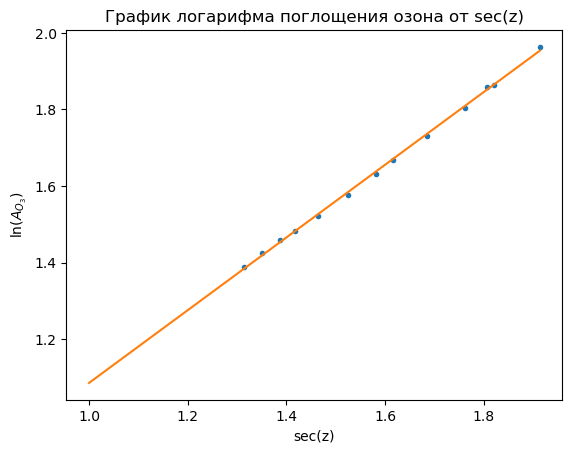

In [76]:
import matplotlib.pyplot as plt
sec_z = 1/np.cos((90-df[0])/180*np.pi)
plt.plot(sec_z, absorbtion,'.')
p = np.polyfit(sec_z, absorbtion, 1)
ab_pred = np.polyval(p, np.append(sec_z,1))
plt.plot(np.append(sec_z,1), ab_pred)
plt.title('График логарифма поглощения озона от sec(z)')
plt.xlabel('sec(z)')
plt.ylabel('$\ln(A_{O_3})$')

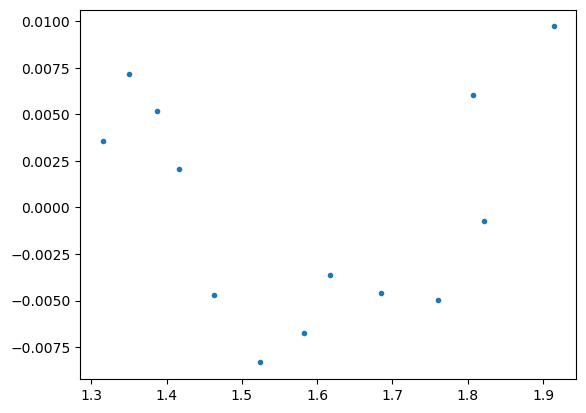

In [80]:
plt.plot(sec_z, absorbtion-ab_pred[:-1],'.')

In [73]:
tau = p[0]+p[1]

k = np.sum(sec_z*absorbtion)/np.sum(sec_z**2)
tau = k
# p

In [60]:
# 2.5*np.log10(np.e)

$\tau = n \sigma l$

$N = nV  = nSl$

$N/S = nl = \tau/\sigma$

In [74]:
sigma = 1e-23
N = tau/sigma

$pV = \frac{M}{\mu} RT$

$p =\frac{\rho}{\mu} RT$

$\rho =\frac{p\mu}{RT}$

$$h = \frac{N m_0}{\mu pS} RT$$

In [75]:
(N/(6.02e23*1e5)*8.31*273)*1e3

3.897019336267303